---
title: "Primer avance"
date: "2022-05-07"
format:
  html:
    self-contained: true
    theme: cerulean
    toc: true
    toc-depth: 4
    code-tools: true
    toc-title: "Tabla de contenido"
---

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cargamos la base de datos
# tracks = pd.read_csv(r'F:\2022-1\Analisis de datos\Tarea Academica\archive\tracks.csv')
tracks = pd.read_csv("D:/proyecto-analisis-de-datos-1INF03/datos/tracks.csv")

In [3]:
print('La base tiene la forma',tracks.shape)

La base tiene la forma (586672, 20)


In [4]:
# Las primeras cinco observaciones
tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
# Descripción de la base
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

## **Pre-procesamiento de datos**

In [6]:
# Información de la base de datos
# Omitimos duplicados 
print(tracks.shape)
tracks.drop_duplicates(subset = 'id', inplace=True)
print(tracks.shape)

(586672, 20)
(586672, 20)


In [7]:
# Contabilizamos vacíos
vacios = pd.DataFrame(tracks.isnull().sum()).sort_values(0,ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/tracks.shape[0], 2)*100
vacios 

,vacios,vacios%
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
key,0,0.0
energy,0,0.0


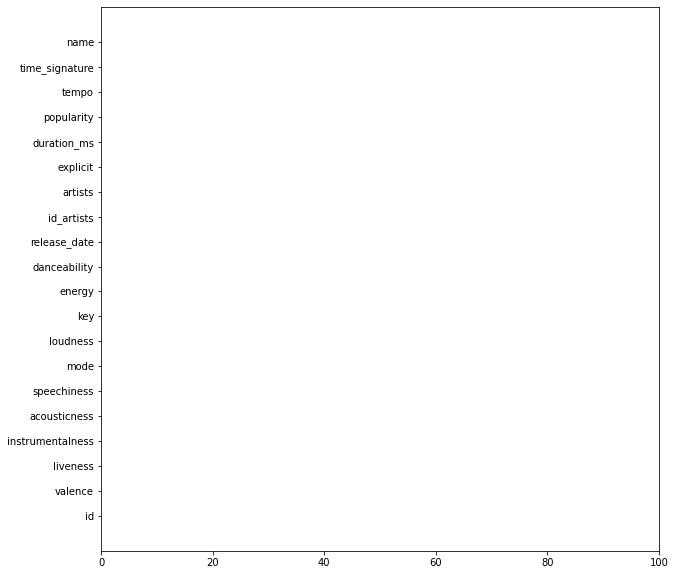

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
vac = np.arange(len(vacios['vacios%']))
plt.barh(vac, vacios['vacios%'])
plt.yticks(vac, vacios.index)
plt.xlim([0, 100])
plt.show()

In [9]:
# Excluimos vacíos
print(tracks.shape) 
tracks.dropna(inplace=True)
print(tracks.shape)

(586672, 20)
(586601, 20)


## **Tratamiento de Datos Atípicos y Estadísticas Descriptivas**

In [10]:
# Separación de variables numéricas y categóricas
dfnum = tracks.select_dtypes(include=['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude=['float64', 'int64'])

In [11]:
dfnum.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [12]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586601 non-null  int64  
 1   duration_ms       586601 non-null  int64  
 2   explicit          586601 non-null  int64  
 3   danceability      586601 non-null  float64
 4   energy            586601 non-null  float64
 5   key               586601 non-null  int64  
 6   loudness          586601 non-null  float64
 7   mode              586601 non-null  int64  
 8   speechiness       586601 non-null  float64
 9   acousticness      586601 non-null  float64
 10  instrumentalness  586601 non-null  float64
 11  liveness          586601 non-null  float64
 12  valence           586601 non-null  float64
 13  tempo             586601 non-null  float64
 14  time_signature    586601 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 71.6 MB


-----

In [13]:
dfcat.head(5)

,id,name,artists,id_artists,release_date
0,35iwgR4jXetI318WEWsa1Q,Carve,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922


In [14]:
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            586601 non-null  object
 1   name          586601 non-null  object
 2   artists       586601 non-null  object
 3   id_artists    586601 non-null  object
 4   release_date  586601 non-null  object
dtypes: object(5)
memory usage: 26.9+ MB


In [15]:
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586601, 5)
Variables numéricas (586601, 15)


In [91]:
# Convertimos la variable 'release_date' a datetime64[ns]
dfcat['release_date'] = pd.to_datetime(dfcat['release_date'], format="%Y-%m-%d")

### Tratamiento de datos atípicos

#### Datos numéricos

In [93]:
descriptivesMax_num = dfnum.describe(percentiles = list(np.arange(0, 1, 0.05)))
descriptivesMax_num

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,9.730700e+04,0.000000,0.267000,0.120000,0.000000,-19.843000,0.000000,0.027600,0.001770,0.000000,0.058900,0.121000,75.929000,3.000000
10%,2.000000,1.342190e+05,0.000000,0.334000,0.190000,0.000000,-16.893000,0.000000,0.029400,0.010500,0.000000,0.072500,0.188000,81.288000,3.000000
15%,5.000000,1.522990e+05,0.000000,0.382000,0.248000,1.000000,-15.137000,0.000000,0.030900,0.028700,0.000000,0.082500,0.244000,86.856000,4.000000
20%,9.000000,1.649200e+05,0.000000,0.420000,0.298000,2.000000,-13.886000,0.000000,0.032400,0.057700,0.000000,0.090900,0.299000,91.775000,4.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000


In [97]:
# Variables que tienen valores atípicos superiores
descriptivesMax_num.loc['max'] > (descriptivesMax_num.loc['75%'] + (1.5* (descriptivesMax_num.loc['75%']-descriptivesMax_num.loc['25%']) ) )

popularity           True
duration_ms          True
explicit             True
danceability        False
energy              False
key                 False
loudness             True
mode                False
speechiness          True
acousticness        False
instrumentalness     True
liveness             True
valence             False
tempo                True
time_signature       True
dtype: bool

In [98]:
descriptivesMin = dfnum.describe(percentiles = list( np.arange(0, 1, 0.05)) )
descriptivesMin

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,9.730700e+04,0.000000,0.267000,0.120000,0.000000,-19.843000,0.000000,0.027600,0.001770,0.000000,0.058900,0.121000,75.929000,3.000000
10%,2.000000,1.342190e+05,0.000000,0.334000,0.190000,0.000000,-16.893000,0.000000,0.029400,0.010500,0.000000,0.072500,0.188000,81.288000,3.000000
15%,5.000000,1.522990e+05,0.000000,0.382000,0.248000,1.000000,-15.137000,0.000000,0.030900,0.028700,0.000000,0.082500,0.244000,86.856000,4.000000
20%,9.000000,1.649200e+05,0.000000,0.420000,0.298000,2.000000,-13.886000,0.000000,0.032400,0.057700,0.000000,0.090900,0.299000,91.775000,4.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000


In [99]:
# Variables que tienen valores atípicos inferiores
descriptivesMin.loc['min'] < ( descriptivesMin.loc['25%'] + (1.5* (descriptivesMax_num.loc['75%']-descriptivesMax_num.loc['25%']) ) ) 

popularity           True
duration_ms          True
explicit            False
danceability         True
energy               True
key                  True
loudness             True
mode                 True
speechiness          True
acousticness         True
instrumentalness     True
liveness             True
valence              True
tempo                True
time_signature       True
dtype: bool

In [100]:
dfnum.describe().quantile(0.5)

popularity              27.286606
duration_ms         222480.926313
explicit                 0.022046
danceability             0.570306
energy                   0.545536
key                      5.110797
loudness                -7.861500
mode                     0.829399
speechiness              0.090585
acousticness             0.435901
instrumentalness         0.061487
liveness                 0.199131
valence                  0.558153
tempo                  117.927465
time_signature           4.000000
Name: 0.5, dtype: float64

In [101]:
dfnum.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

Variables categóricas (con representacion numérica): \
explicit, key y mode. 

In [16]:
# Variables con valores atípicos
dfnum_outlier = dfnum[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [17]:
dfnum_outlier.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.563612,0.542071,-10.205789,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.166101,0.251910,5.089422,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000
50%,27.000000,2.149070e+05,0.577000,0.549000,-9.242000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000
75%,41.000000,2.638670e+05,0.686000,0.748000,-6.481000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000
max,100.000000,5.621218e+06,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [104]:
dfnum.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

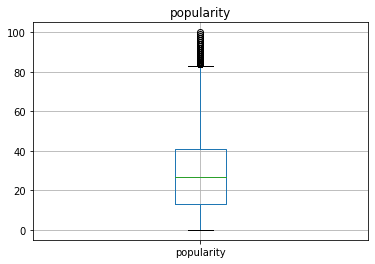

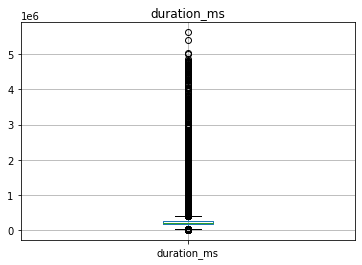

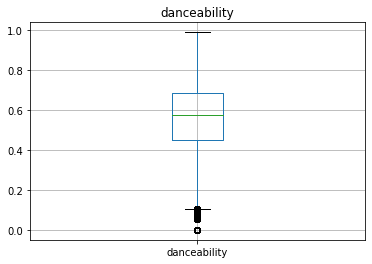

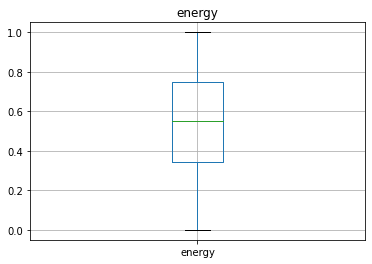

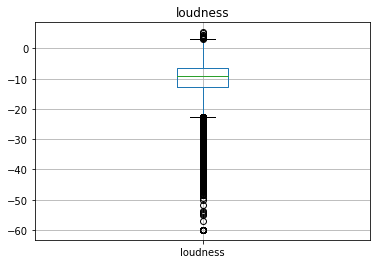

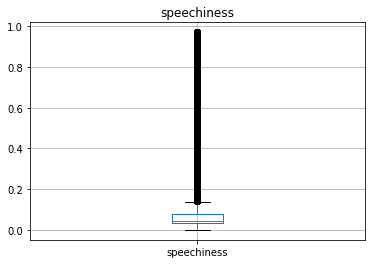

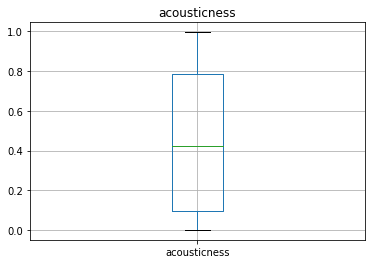

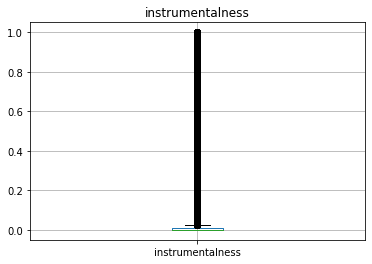

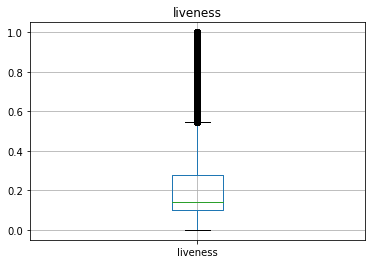

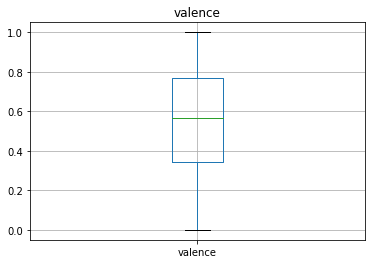

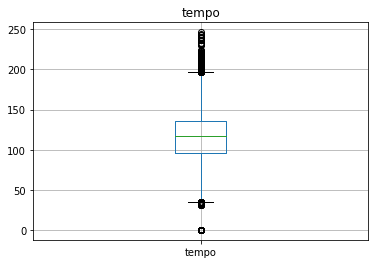

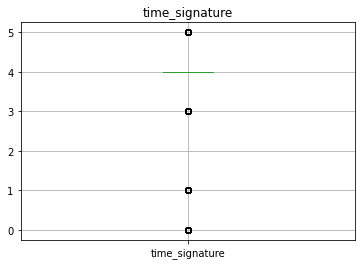

In [18]:
columnas = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
for col in columnas:
    dfnum_outlier.boxplot(column = [col])
    plt.title(col)
    plt.show()


In [19]:
# Podemos definir una función que haga lo mismo para cualquier columna numérica
def loc_outliers(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  ll = q1 - 1.5*iqr
  return (df[columna] > ul) | (df[columna] < ll) 

In [20]:
# Define una función que encuentre todos los outliers por exceso
def loc_outliers_exceso(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  return (df[columna] > ul)

# Define una función que encuentre todos los outliers por defecto
def loc_outliers_defecto(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ll = q1 - 1.5*iqr
  return (df[columna] < ll)

In [21]:
# Reemplazamos todos los outliers por exceso de la columna "antiguedad" por el máximo valor No outlier
for col in columnas:
    dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)==False, col].max()
    dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)==False, col].min()

C:\Users\HP\AppData\Local\Temp\ipykernel_16208\3525050936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)==False, col].max()


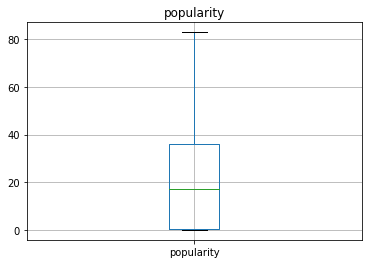

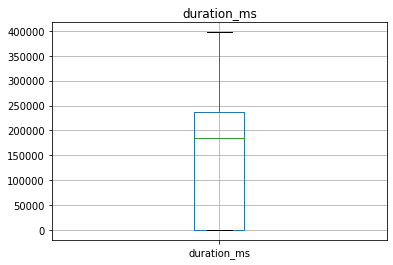

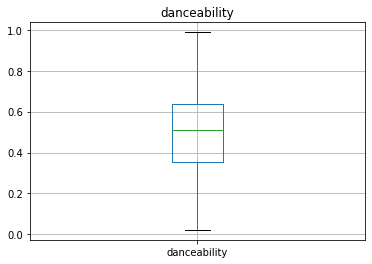

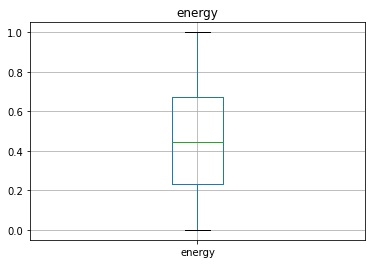

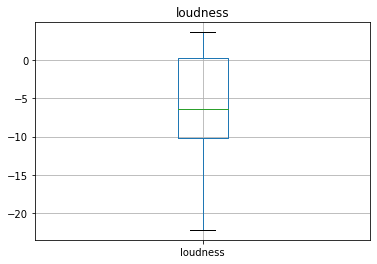

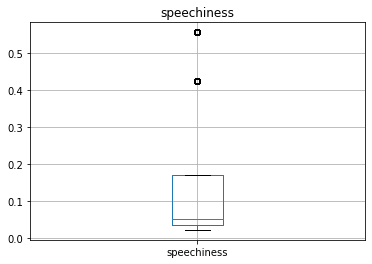

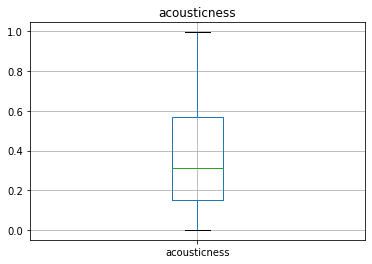

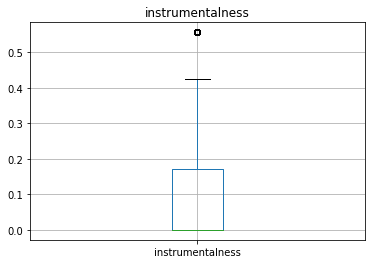

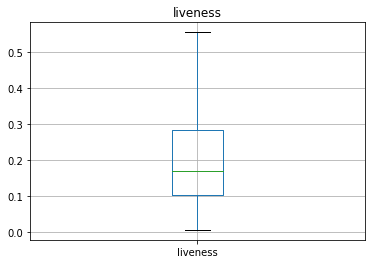

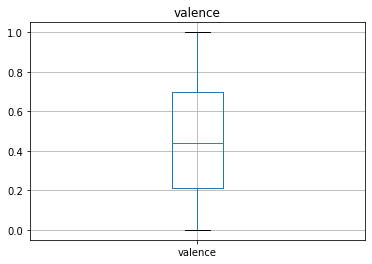

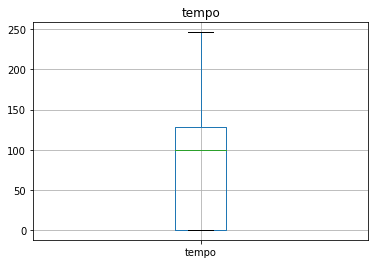

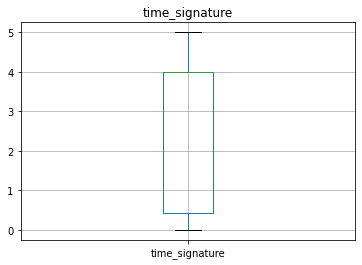

In [22]:
# Volvemos a generar boxplots para verificar imputaciones
for col in columnas:
    dfnum_outlier.boxplot(column = [col])
    plt.title(col)
    plt.show()

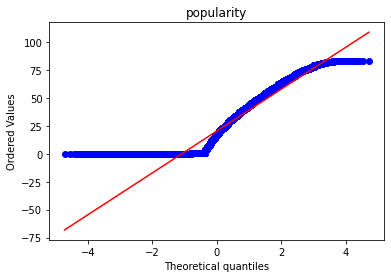

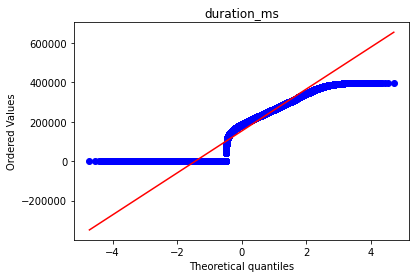

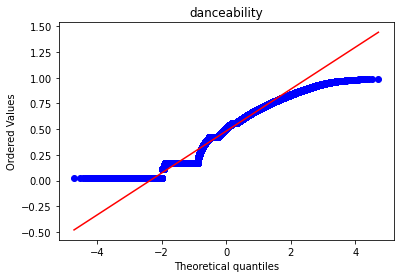

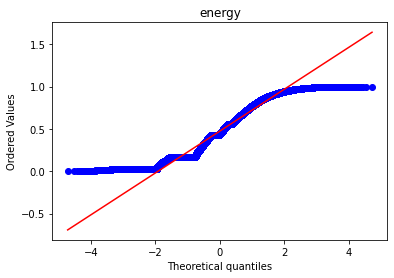

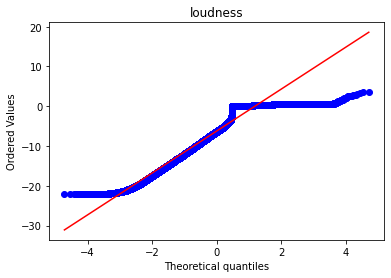

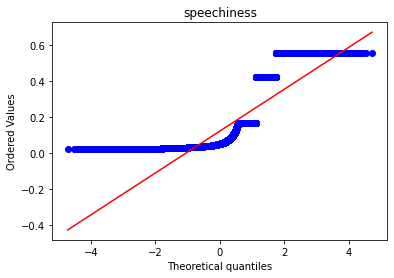

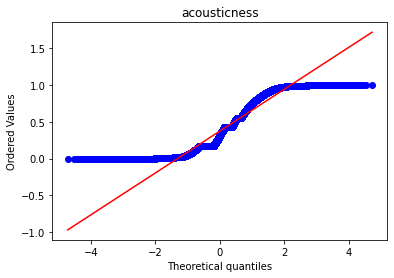

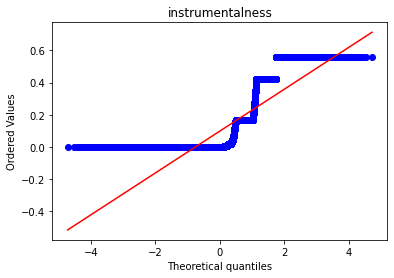

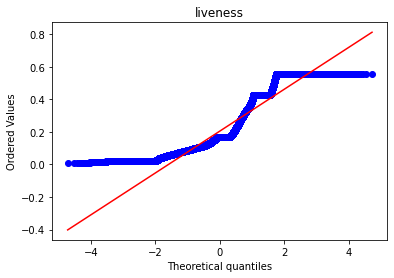

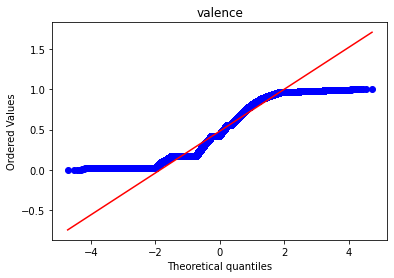

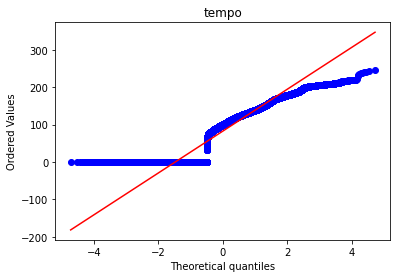

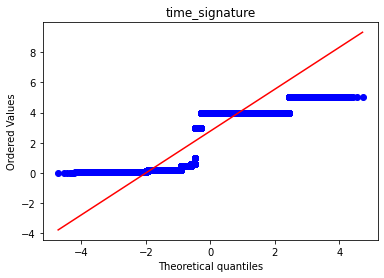

In [23]:
# Graficamos el Q-Q plot de cada variable
# ¿Qué variables aparentemente siguen una distribución normal/gaussiana?
import pylab 
import scipy.stats as stats

# La funcion select_dtypes genera un data frame formado únicamente por
# columnas del tipo indicado como argumento
for col in dfnum_outlier.select_dtypes('number').columns:
  stats.probplot(dfnum_outlier[col], dist = "norm", plot = plt)
  plt.title(col)
  pylab.show()